#CSV analyzer for The New York Times

In [158]:
import math
import pickle
from datetime import datetime

import blaze
import pandas as pd
# from blaze import Data, DataFrame, by, join, merge, odo, into
from dateutil.relativedelta import relativedelta
# from nltk.tokenize import sent_tokenize
from pymongo import MongoClient
# from slugify import slugify

## Data

In [2]:
total_data = pd.read_csv('../nytimes/rows.csv')

In [3]:
total_data.count()

article_id       1544383
pub_date         1544383
section_name     1544383
web_url          1544383
term_category    1544383
term             1544383
sentence         1544383
dtype: int64

In [4]:
total_data_dedup = total_data.drop_duplicates()

In [5]:
total_data_dedup.count()

article_id       1432978
pub_date         1432978
section_name     1432978
web_url          1432978
term_category    1432978
term             1432978
sentence         1432978
dtype: int64

In [98]:
total_data_dedup[total_data_dedup.term == 'ebay']

,article_id,pub_date,section_name,web_url,term_category,term,sentence
479,4fd2173e8eb7c8105d792d10,1999-01-13T00:00:00Z,Business,http://www.nytimes.com/1999/01/13/business/the...,3,ebay,Ebay which was offered to the public in Septem...
809,4fd1e8138eb7c8105d735bbd,1999-02-28T00:00:00Z,Technology; Business,http://www.nytimes.com/1999/02/28/business/sai...,3,ebay,''make markets'' facilitating investors' trade...
2926,4fd25f0c8eb7c8105d80eb13,2005-07-19T00:00:00Z,Sports,http://www.nytimes.com/2005/07/19/sports/baseb...,3,ebay,It helps that the kayakers of McCovey Cove hav...
3313,4fd1f4088eb7c8105d74ce09,1999-02-21T00:00:00Z,Technology; Business,http://www.nytimes.com/1999/02/21/business/pre...,3,ebay,But Jeff Skoll 33 a founder of Ebay the on-lin...
3511,4fd200828eb7c8105d763de9,1999-08-09T00:00:00Z,Technology; Business,http://www.nytimes.com/1999/08/09/business/pat...,3,ebay,AFICIONADOS of Ebay one of the most popular an...
3512,4fd200828eb7c8105d763de9,1999-08-09T00:00:00Z,Technology; Business,http://www.nytimes.com/1999/08/09/business/pat...,3,ebay,AFICIONADOS of Ebay one of the most popular an...
3794,4fd219c98eb7c8105d797d18,2000-08-03T00:00:00Z,Technology,http://www.nytimes.com/2000/08/03/technology/q...,3,ebay,Putting Photos of Wares Onto eBay Auction Site
3795,4fd219c98eb7c8105d797d18,2000-08-03T00:00:00Z,Technology,http://www.nytimes.com/2000/08/03/technology/q...,3,ebay,Q. I am a computer novice and would like to se...
3796,4fd219c98eb7c8105d797d18,2000-08-03T00:00:00Z,Technology,http://www.nytimes.com/2000/08/03/technology/q...,3,ebay,To display pictures of your wares on the eBay ...
3798,4fd219c98eb7c8105d797d18,2000-08-03T00:00:00Z,Technology,http://www.nytimes.com/2000/08/03/technology/q...,3,ebay,To display pictures of your wares on the eBay ...


In [6]:
list(total_data_dedup.term.value_counts().items())

[('executive', 296247),
 ('Become Inc', 283621),
 ('manager', 140885),
 ('founder', 81439),
 ('Indeed', 74720),
 ('at&t', 44971),
 ('apple', 40970),
 ('ford', 39614),
 ('twitter', 37697),
 ('Google', 35672),
 ('facebook', 34605),
 ('microsoft', 29673),
 ('Voices.com', 28494),
 ('Signal', 27596),
 ('general motors', 18827),
 ('amazon.com', 18529),
 ('wal-mart', 13781),
 ('entrepreneur', 13041),
 ('visa', 10721),
 ('walt disney company', 9578),
 ('intel corporation', 9208),
 ('boeing', 9075),
 ('ebay', 8978),
 ('coca-cola company', 8243),
 ('general electric', 8179),
 ('Exec', 6026),
 ('nike', 5425),
 ('samsung', 5229),
 ('exxon', 4721),
 ('BERG', 4352),
 ('omnicom group', 4260),
 ('netflix', 3928),
 ('johnson & johnson', 3432),
 ('morgan chase', 2909),
 ('berkshire hathaway', 2782),
 ('mckinsey & company', 2727),
 ('chevron', 2643),
 ('instagram', 2612),
 ('pepsico', 2558),
 ('cisco systems', 2547),
 ('pricewaterhousecoopers', 2527),
 ('halliburton company', 2319),
 ('Nordic', 2315),
 (

In [7]:
# Remove
remove_list = ['Become Inc', 'Indeed', 'at&t', 'Signal']

In [8]:
for term in remove_list:
    total_data_dedup = total_data_dedup[total_data_dedup['term'] != term]

In [9]:
total_data_dedup.count()

article_id       1002070
pub_date         1002070
section_name     1002070
web_url          1002070
term_category    1002070
term             1002070
sentence         1002070
dtype: int64

In [10]:
total_grouped = total_data_dedup.groupby(['article_id', 'term'])['sentence']

In [80]:
def indexes_to_delete(series):
    del_index_list = []
    for i1, s1 in series.items():
        for i2, s2 in series.items():
            if i1 != i2 and s1 in s2:
                del_index_list.append(i1)
                break
    return str(del_index_list)

In [14]:
grouped_indexes = total_grouped.aggregate({'indexes_to_delete': indexes_to_delete})

In [15]:
remove_index_list = list(set(
    [index for index_list in grouped_indexes['indexes_to_delete'] for index in eval(index_list)]
))

In [129]:
data = total_data_dedup.drop(remove_index_list)

In [130]:
data.count()

article_id       934648
pub_date         934648
section_name     934648
web_url          934648
term_category    934648
term             934648
sentence         934648
dtype: int64

In [153]:
df = pd.DataFrame([
                [1, 'hola', 'Hola mundo'],         # 0
                [1, 'nada', 'Nada que ver'],       # 1
                [1, 'hola', 'Hola mundo que tal'], # 2
                [1, 'hola', 'Hola'],               # 3
                [2, 'hola', 'Hola mundo'],         # 4
                [2, 'adios', 'Adios'],             # 5
                [3, 'adios', 'Adios'],             # 6
               ], columns=['article_id', 'term', 'sentence'])
g = df.groupby(['article_id', 'term'])['sentence'].aggregate({'indexes_to_delete': indexes_to_delete})
l = list(set(
    [index for index_list in g['indexes_to_delete'] for index in eval(index_list)]
))
df2 = df.drop(l)
df2

,article_id,term,sentence
1,1,nada,Nada que ver
2,1,hola,Hola mundo que tal
4,2,hola,Hola mundo
5,2,adios,Adios
6,3,adios,Adios


In [154]:
length = len(df)

In [157]:
length

7

In [159]:
n = 2

In [160]:
ch = math.ceil(length / n)

In [161]:
ch

4

In [ ]:
d = {}
for i in range(2):

In [132]:
# Change categories: ebay; executive, manager; entrepreneur, founder, new venture, startup

data.ix[data.term == 'ebay', 'term_category'] = 2

for term in ['executive', 'manager']:
    data.ix[data.term == term, 'term_category'] = 11

for term in ['entrepreneur', 'founder', 'new venture', 'startup']:
    data.ix[data.term == term, 'term_category'] = 12

In [133]:
# Total number of articles
data.article_id.value_counts().count()

530259

In [134]:
# Total number of terms
data.term.value_counts().count()

215

In [135]:
# Total number of sentences
data.sentence.value_counts().count()

846383

In [136]:
data.to_csv('../nytimes/curated_data.csv')

## Classifier

In [123]:
with open('sentiment/be.pickle', 'rb') as be_file:
    be = pickle.load(be_file)

In [124]:
be.predict(['My puppy is cute.', 'People die in war.', 'I love my family.'])

array(['pos', 'neg', 'pos'], dtype=object)

In [137]:
data_blaze = blaze.Data(data)

In [141]:
sentiments_df = blaze.odo(data_blaze.sentence.map(lambda x: be.predict([x])[0], '?string'), pd.DataFrame)

NameError: name 'ablaze' is not defined

In [ ]:
data['sentiment'] = sentiments_df

In [139]:
def diff_month(d1, d2):
    return (d2.year - d1.year) * 12 + d2.month - d1.month

# assert diff_month(datetime(2010,9,1), datetime(2010,10,1)) == 1
# assert diff_month(datetime(2009,10,1), datetime(2010,10,1)) == 12
# assert diff_month(datetime(2009,11,1), datetime(2010,10,1)) == 11
# assert diff_month(datetime(2009,8,1), datetime(2010,10,1)) == 14

In [ ]:
data['n_month'] = data.pub_date.apply(lambda x: diff_month(datetime(1999, 1, 1), x.date()))

In [ ]:
data.groupby(['article_id', 'term'])['sentence']

In [ ]:
total_grouped.aggregate({'indexes_to_delete': indexes_to_delete})

In [141]:
data2 = Data(data_df)

In [142]:
by(data2.term_category,
   total_amount=data2.sentiment.count(),
   amount_pos=data2[data2.sentiment == 'pos'].sentiment.count(),
   amount_neg=data2[data2.sentiment == 'neg'].sentiment.count()
)

,term_category,amount_neg,amount_pos,total_amount
0,1,72041,113193,185234
1,2,48605,109181,157786
2,3,3063,8622,11685


In [195]:
%matplotlib inline

In [201]:
xx = by(merge(data2.term, data2.n_month),
   total_amount=data2.sentiment.count(),
   amount_pos=data2[data2.sentiment == 'pos'].sentiment.count(),
   amount_neg=data2[data2.sentiment == 'neg'].sentiment.count()
)

In [231]:
dd = odo(xx[xx.term == 'Google'], DataFrame)

In [232]:
dd.set_index('n_month', inplace=True)

In [233]:
dd.index = [datetime.strptime("1999-01-01", "%Y-%m-%d") + relativedelta(months=i) for i in dd.index]

In [234]:
dd['amount_neg_rate'] = dd['amount_neg'] / dd['total_amount']
dd['amount_pos_rate'] = dd['amount_pos'] / dd['total_amount']

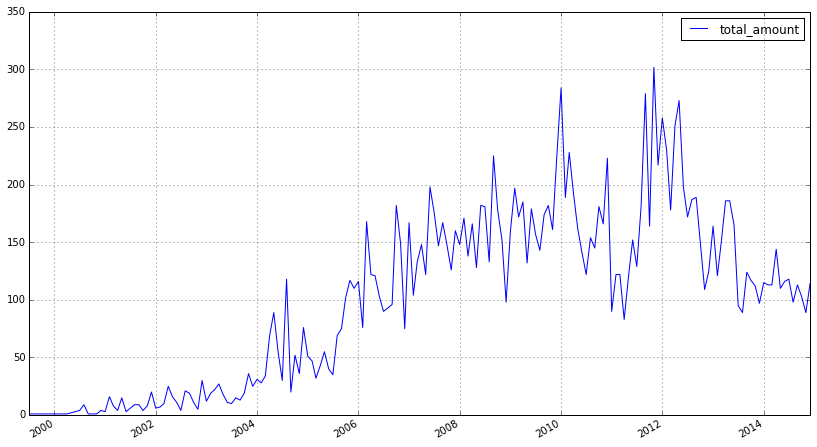

In [239]:
dd[['total_amount']].plot(figsize=(14,8))

In [178]:
dd.index = ind